In [1]:
import numpy as np, healpy as hp, curvedsky, prjlib, plottools as pl, quad_func, binning as bn, tools_qrec, pickle
from matplotlib.pyplot import *

#### Compare NILC case

In [2]:
pnew = prjlib.init_analysis(wtype='LmaskN18',fltr='none',dtype='dr2_nilc')
qtau, __, __, __, __ = tools_qrec.init_quad(pnew.ids,pnew.stag,mfmax=100,n0max=50,rlmin=100,rlmax=2048)

#### Input Cl

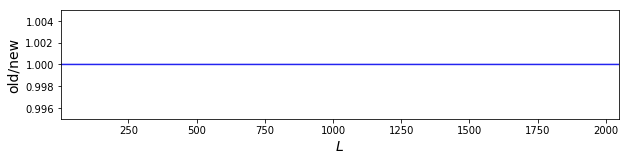

In [3]:
l18, lcl18 = (np.loadtxt(prjlib.data_directory()['root']+'/input/aps_N18.dat',usecols=(0,1))).T[:,:pnew.lmax-1]
lcl18 *= 2*np.pi/l18/(l18+1)/2.726e6**2
pl.plot_1dstyle(fsize=[10,2],ylab='old/new',ymin=0.995,ymax=1.005,xmin=2,xmax=2048)
plot(l18,lcl18/pnew.lcl[0][2:])

In [4]:
D18cmb = prjlib.data_directory()['cmb'] + '/N18/'
cl, CL = {}, {}
L, CL['r'] = (np.loadtxt(D18cmb+'aps_obs_1d_nilc_Lmask1.dat',usecols=(0,1))).T
L, CL['s'], CL['n'], CL['p'], CL['c'] = (np.loadtxt(D18cmb+'aps_sim_1d_nilc_Lmask1.dat',usecols=(0,1,2,3,4))).T
l, cl['r'] = (np.loadtxt(pnew.fcmb.cl[0],usecols=(0,1))).T
l, cl['s'], cl['n'], cl['p'], cl['c'] = (np.loadtxt(pnew.fcmb.scl,usecols=(0,1,2,3,4))).T

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


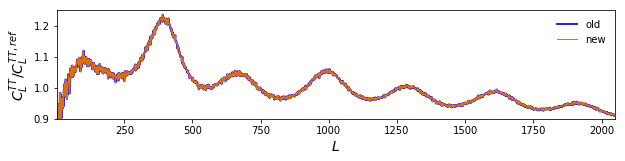

In [5]:
pl.plot_1dstyle(fsize=[10,2],ylab='$C^{TT}_L/C^{TT,ref}_L$',ymin=0.9,ymax=1.25,xmin=2,xmax=2048)
plot(l[1:],CL['s'][:2048]/pnew.lcl[0][1:],label='old',lw=2)
plot(l[1:],cl['s'][1:]/pnew.lcl[0][1:],label='new',lw=1)
legend()

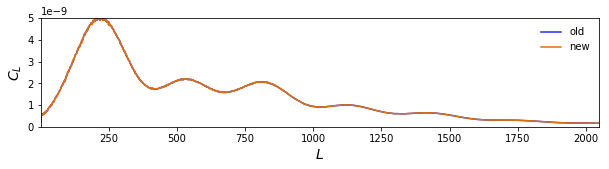

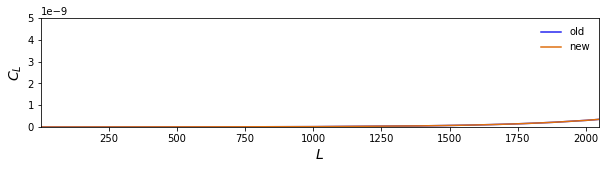

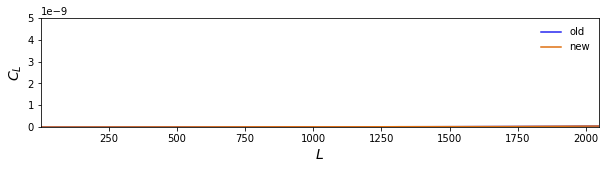

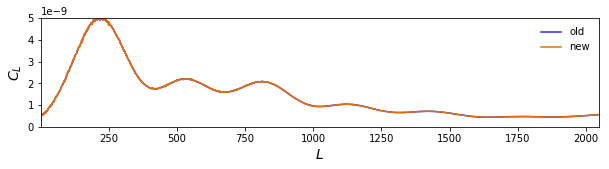

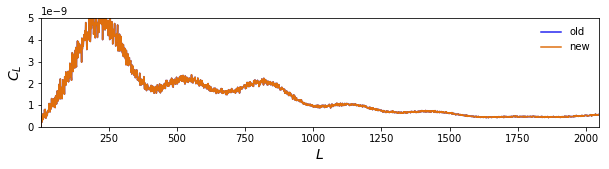

In [6]:
for s in ['s','n','p','c','r']:
    pl.plot_1dstyle(fsize=[10,2],ymin=1e-11,ymax=5e-9,xmin=2,xmax=2048)
    plot(L,L**2*CL[s],label='old')
    plot(l,l**2*cl[s],label='new')
    legend()
    show()

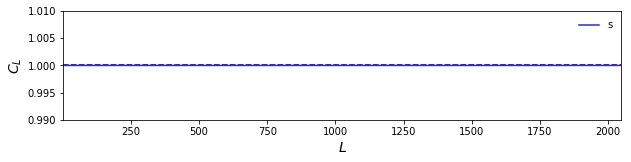

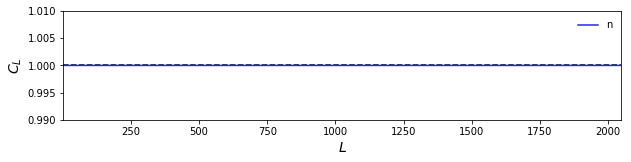

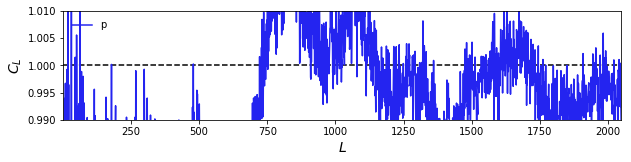

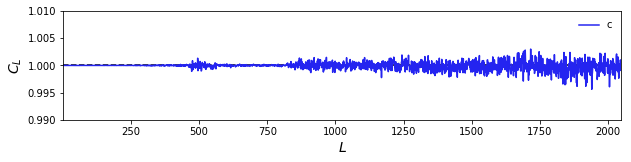

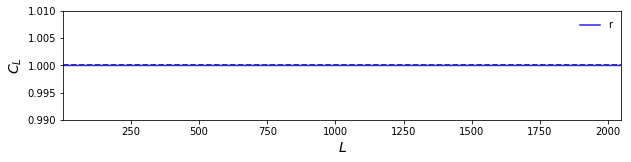

In [7]:
for s in ['s','n','p','c','r']:
    pl.plot_1dstyle(fsize=[10,2],ymin=0.99,ymax=1.01,xmin=2,xmax=2048)
    axhline(1,color='k',ls='--')
    plot(l[1:],CL[s][0:pnew.lmax]/cl[s][1:],label=s)
    legend()
    show()

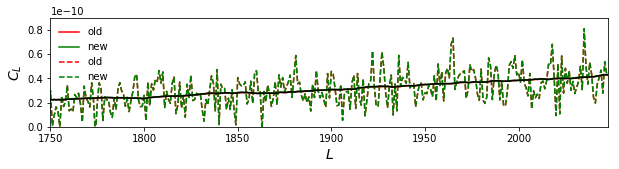

In [8]:
Lp, Ptsr = np.loadtxt(D18cmb+'ptsr_nilc_Lmask1.dat',unpack=True,usecols=(0,1))
lp, ptsr = np.loadtxt(pnew.fptsrcl,unpack=True,usecols=(0,1))
pl.plot_1dstyle(fsize=[10,2],ymin=1e-15,ymax=9e-11,xmin=1750,xmax=2048)
plot(L,L**2*CL['p'],label='old',color='r')
plot(l,l**2*cl['p'],label='new',color='g')
plot(L,L**2*(CL['r']-CL['s']-CL['n']),label='old',color='r',ls='--')
plot(l,l**2*(cl['r']-cl['s']-cl['n']),label='new',color='g',ls='--')
plot(lp,lp**2*ptsr,color='k')
legend()
show()

In [9]:
D18tau = prjlib.data_directory()['root'] + '/tau/N18/'
L, Al18 = (np.loadtxt(D18tau+'Al1d_nilc_Lmask1_l100-2048_oL1-2048.dat')).T
L, N018 = (np.loadtxt(D18tau+'N0_nilc_Lmask1_l100-2048.dat')).T
L, ct18, vt18 = (np.loadtxt(D18tau+'ctt_nilc_Lmask1_l100-2048_oL1-2048.dat',usecols=(0,1,2))).T
L, mf18 = (np.loadtxt(D18tau+'ml_nilc_Lmask1_l100-2048_oL1-2048_real.dat',usecols=(0,1))).T
L, cr18 = (np.loadtxt(D18tau+'ctt_nilc_Lmask1_l100-2048_oL1-2048_real.dat',usecols=(0,1))).T

No handles with labels found to put in legend.


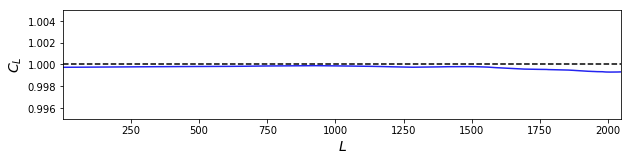

In [10]:
al = (np.loadtxt(qtau.f['TT'].al)).T[1]
pl.plot_1dstyle(fsize=[10,2],ymin=0.995,ymax=1.005,xmin=2,xmax=2048)
axhline(1,color='k',ls='--')
plot(qtau.l[1:],Al18[0:pnew.lmax]/al[1:])
legend()

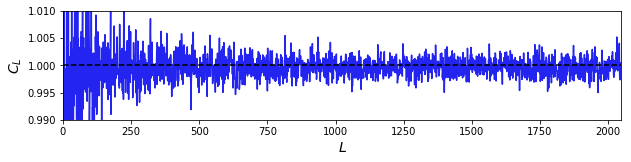

In [11]:
n0 = (np.loadtxt(qtau.f['TT'].n0bs)).T[1]
pl.plot_1dstyle(fsize=[10,2],ymin=0.99,ymax=1.01,xmin=1,xmax=2048)
plot(qtau.l[1:],N018[0:pnew.lmax]/n0[1:])
axhline(1,color='k',ls='--')

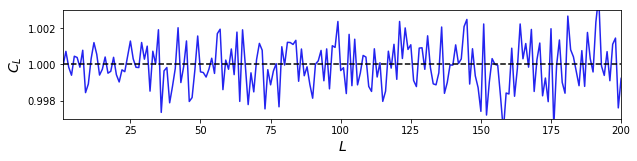

In [12]:
mf = (np.loadtxt(qtau.f['TT'].ml[0])).T[1]
pl.plot_1dstyle(fsize=[10,2],ymin=0.997,ymax=1.003,xmin=1,xmax=200)
plot(mf18[:pnew.lmax]/mf[1:])
axhline(1,color='k',ls='--')

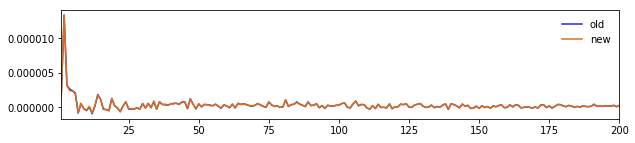

In [13]:
cl = (np.loadtxt(qtau.f['TT'].cl[0])).T[1]
rd = (np.loadtxt(qtau.f['TT'].rdn0[0])).T[1]
sl = np.array( [ (np.loadtxt(qtau.f['TT'].cl[i])).T[1] for i in range(1,20) ] )
xlim(1,200)
plot(L,cr18,label='old')
plot(qtau.l,(cl-rd-n0/qtau.mfsim),label='new')
legend()

#### Mean-field spectrum, raw spectrum and RDN0

In [14]:
Lb, ct18b, vt18b = np.loadtxt(D18tau+'ctt_nilc_Lmask1_l100-2048_oL1-2048_b20.dat',unpack=True,usecols=(0,1,2))
Lb, cr18b = np.loadtxt(D18tau+'ctt_nilc_Lmask1_l100-2048_oL1-2048_b20_real.dat',unpack=True,usecols=(0,1))

In [15]:
mb = bn.multipole_binning(20,lmin=1,lmax=2048)
Cr18b = bn.binning(np.insert(cr18,0,[0]),mb,vl=np.insert(vt18,0,[0]))

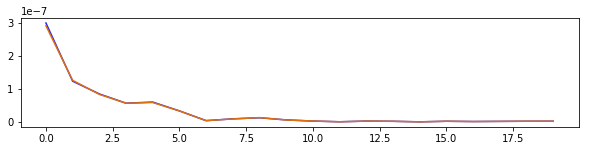

In [16]:
plot(Cr18b)
plot(cr18b)

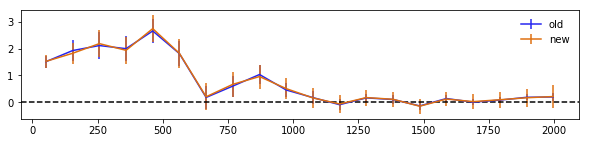

In [17]:
s  = mb.bc * 1e5
sb, vb, ci, cb, vl = bn.binned_spec(mb,qtau.f['TT'].cl,cn=1,doreal=True,opt=True)
n0 = (np.loadtxt(qtau.f['TT'].n0bs)).T[1]
nb = bn.binning(n0,mb,vl=vl)
rd = (np.loadtxt(qtau.f['TT'].rdn0[0])).T[1]
rb = bn.binning(rd,mb,vl=vl)
errorbar(Lb,s*cr18b,yerr=s*vt18b,label='old')
errorbar(mb.bc,s*(cb-rb-nb/(qtau.mfsim)),yerr=s*vb,label='new')
axhline(0,color='k',ls='--')
legend()

<ErrorbarContainer object of 3 artists>

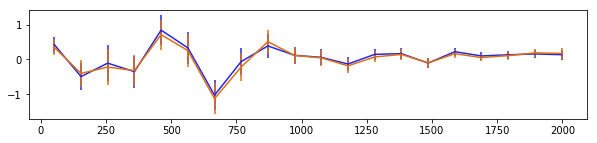

In [18]:
s = Lb*1e5
errorbar(mb.bc,s*(cb-rb-nb/(qtau.mfsim)-(sb-nb-nb/(qtau.mfsim-1))),yerr=s*vt18b)
errorbar(Lb,s*(cr18b-ct18b),yerr=s*vt18b)